In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('train_v9rqX0R.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
for i in (df.select_dtypes(include='object').columns):
    print(i,"--->", df[i].nunique())

Item_Identifier ---> 1559
Item_Fat_Content ---> 5
Item_Type ---> 16
Outlet_Identifier ---> 10
Outlet_Size ---> 3
Outlet_Location_Type ---> 3
Outlet_Type ---> 4


# Handling Missing Data

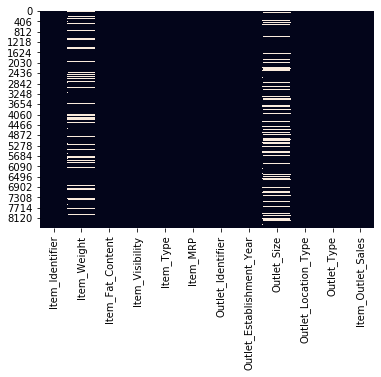

In [8]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [9]:
for i in ['Item_Weight','Outlet_Size']:
    print(i,"--->", df[i].isnull().mean()*100,"%")

Item_Weight ---> 17.165317376510618 %
Outlet_Size ---> 28.27642848762173 %


## Item Weight

In [10]:
wData=df.groupby('Item_Identifier')['Item_Weight'].mean()

In [11]:
wData

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [12]:
df[df['Item_Identifier']=='NCZ54']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
214,NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,1998,NaN,Tier 3,Grocery Store,324.9104
1896,NCZ54,NaN,Low Fat,0.082956,Household,164.0552,OUT027,1985,Medium,Tier 3,Supermarket Type3,5523.4768
1969,NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,2002,NaN,Tier 2,Supermarket Type1,2274.3728
2839,NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,1997,Small,Tier 1,Supermarket Type1,4711.2008
7166,NCZ54,NaN,Low Fat,0.145952,Household,160.9552,OUT019,1985,Small,Tier 1,Grocery Store,162.4552
7738,NCZ54,14.65,Low Fat,0.083699,Household,163.4552,OUT018,2009,Medium,Tier 3,Supermarket Type2,2599.2832
7926,NCZ54,14.65,Low Fat,0.083489,Household,161.3552,OUT049,1999,Medium,Tier 1,Supermarket Type1,7148.0288


In [13]:
miss_bool=df['Item_Weight'].isnull()

In [14]:
df.loc[miss_bool,'Item_Weight']=df.loc[miss_bool,'Item_Identifier'].apply(lambda x: wData[x])

In [15]:
df['Item_Weight'].isnull().sum()

4

In [16]:
df[df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [17]:
df[df['Item_Identifier']=='FDK57']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.044,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.228


## Outlet size

In [18]:
from scipy.stats import mode

In [19]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]) )

In [20]:
print (outlet_size_mode)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [21]:
miss_bool = df['Outlet_Size'].isnull() 

In [22]:
df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [23]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
df.dropna(inplace=True)

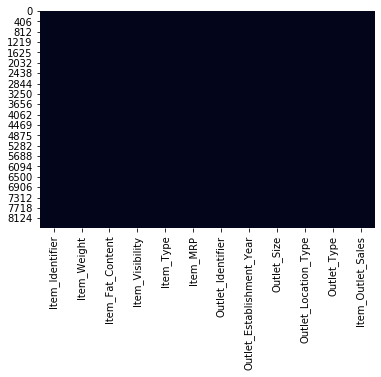

In [25]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# EDA

In [26]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [27]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 632.3+ KB


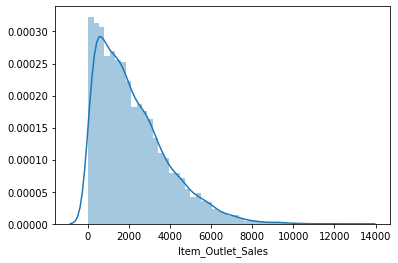

In [29]:
sns.distplot(df['Item_Outlet_Sales'])

Highly skewed data

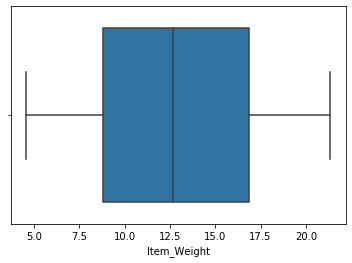

In [30]:
sns.boxplot(df['Item_Weight'])

In [31]:
r=np.corrcoef(df['Item_Weight'],df['Item_Outlet_Sales'])[0,1]
r

0.013167578913664407

* by seeing the correlation coefficent Item_Weight downt effect the price

In [32]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [33]:
df['Item_Fat_Content']=np.where((df.Item_Fat_Content=='low fat')|(df.Item_Fat_Content=='LF'),'Low Fat',df.Item_Fat_Content)
df['Item_Fat_Content']=np.where((df.Item_Fat_Content=='reg'),'Regular',df.Item_Fat_Content)

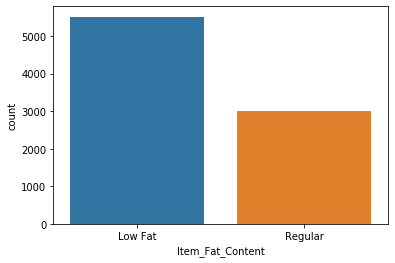

In [34]:
sns.countplot(df['Item_Fat_Content'])
plt.show()

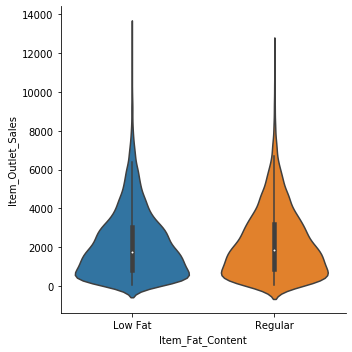

In [35]:
sns.catplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df,kind='violin')

* Doesnt effect 

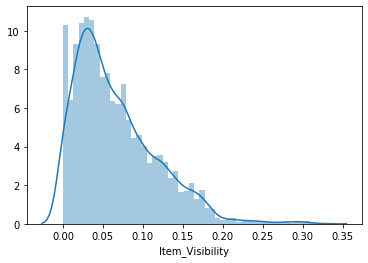

In [36]:
sns.distplot(df['Item_Visibility'])
plt.show()

In [37]:
df['Item_Visibility']=np.where((df.Item_Visibility==0.0),0.003574698,df.Item_Visibility)


In [38]:
df.Item_Visibility.min()

0.003574698

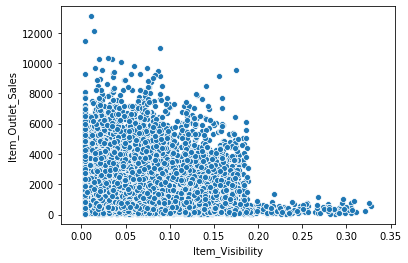

In [39]:
sns.scatterplot(x=df['Item_Visibility'],y=df['Item_Outlet_Sales'])

In [40]:
VData=df.groupby('Item_Visibility')['Item_Outlet_Sales'].mean()

In [41]:
VData.head()

Item_Visibility
0.003575    2224.454224
0.003589    1691.797800
0.003598    2922.196200
0.003599    3075.996000
0.003607    1384.198200
Name: Item_Outlet_Sales, dtype: float64

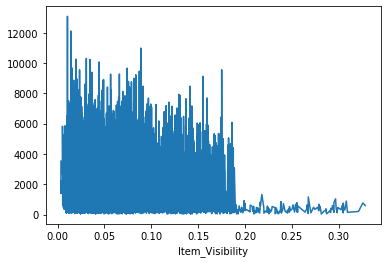

In [42]:
sns.lineplot(x=VData.index,y=VData.values)

In [43]:
r=np.corrcoef(VData.index,VData.values)[0,1]
r

-0.14084607999989693

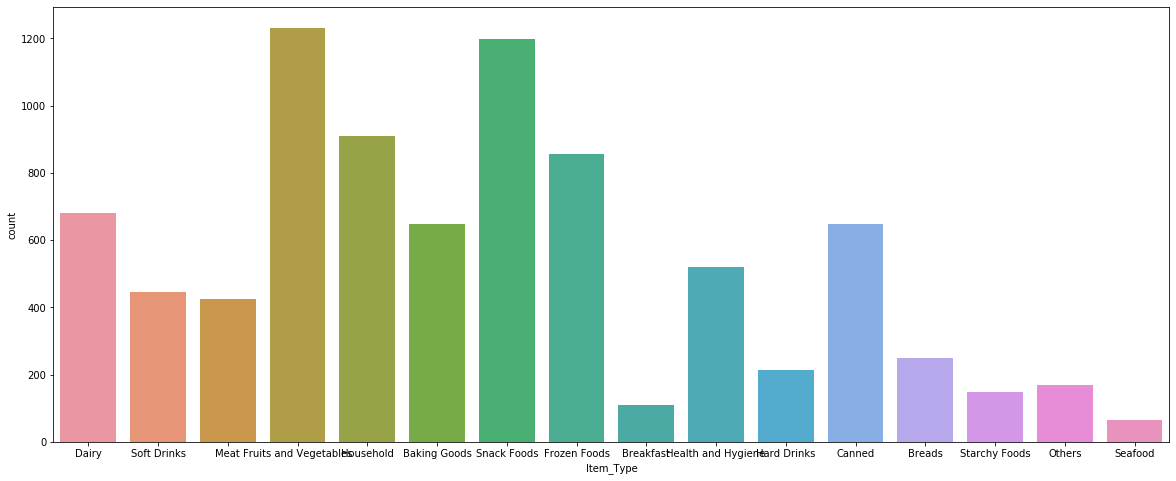

In [44]:
fig,ax=plt.subplots(figsize=(20,8))
sns.countplot(df['Item_Type'],ax=ax)
plt.show()

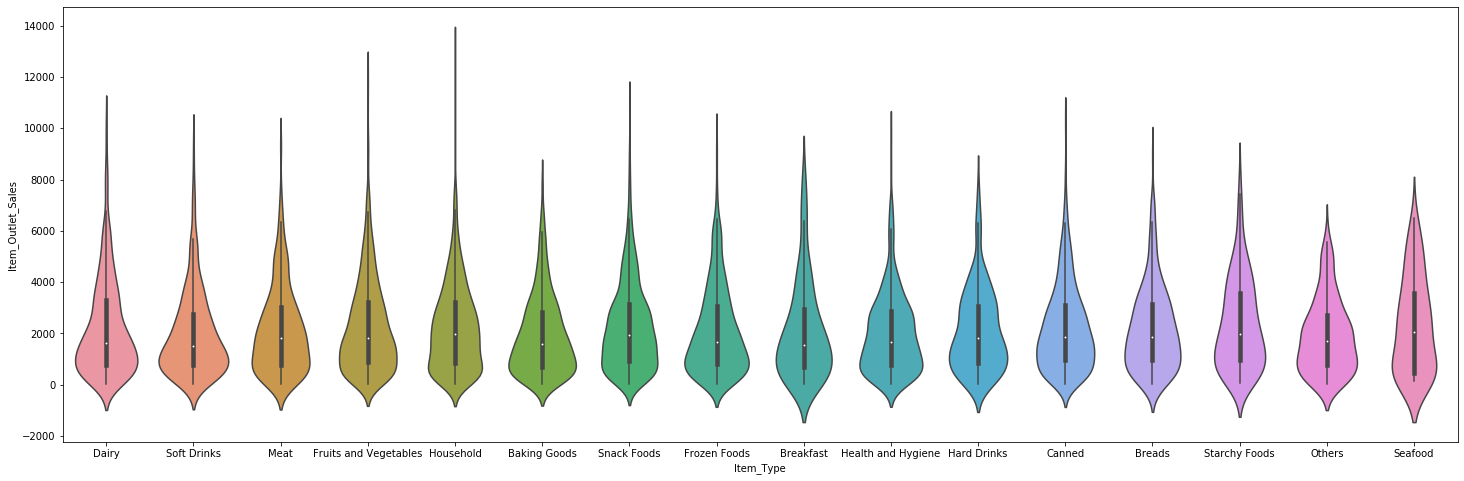

In [45]:
fig,ax=plt.subplots(figsize=(25,8))
sns.violinplot(x='Item_Type',y='Item_Outlet_Sales',data=df,kind='violin',ax=ax)
plt.show()

In [46]:
IData=df.groupby('Item_Type')['Item_Outlet_Sales'].mean()

In [47]:
IData

Item_Type
Baking Goods             1955.803450
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2230.749701
Frozen Foods             2133.526120
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2275.522818
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

* Item Type will effect the outcome

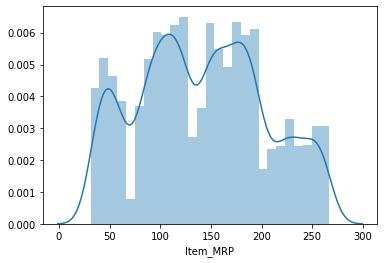

In [48]:
sns.distplot(df['Item_MRP'])

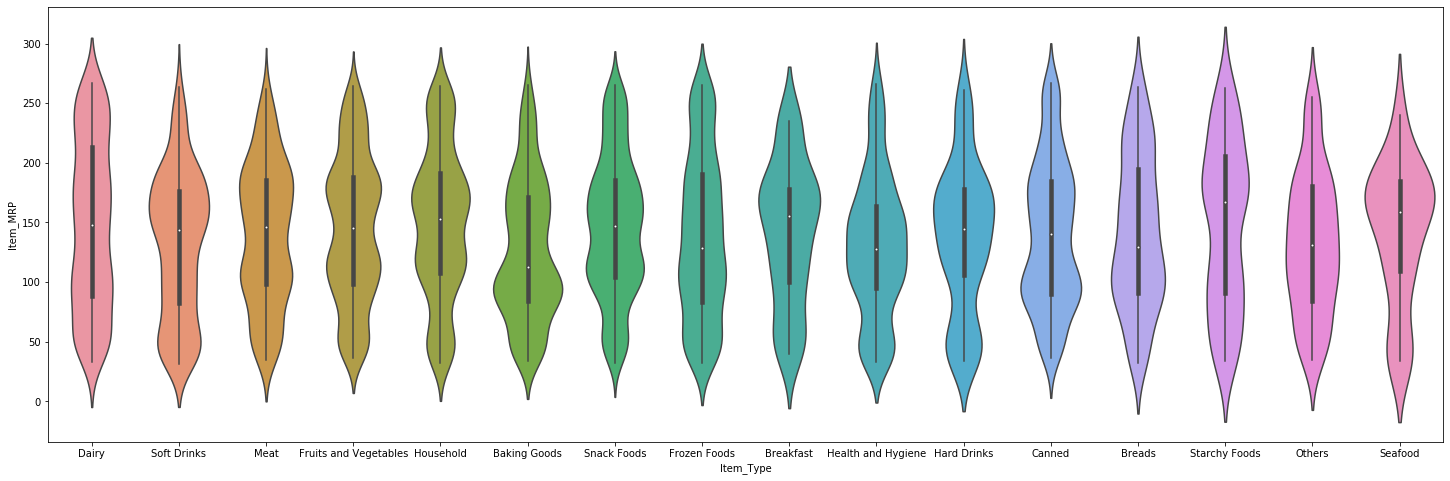

In [49]:
fig,ax=plt.subplots(figsize=(25,8))
sns.violinplot(x='Item_Type',y='Item_MRP',data=df,kind='violin',ax=ax)
plt.show()

In [50]:
r=np.corrcoef(df['Item_MRP'],df['Item_Outlet_Sales'])[0,1]
r

0.56780314333649

* MRP will effect the sales

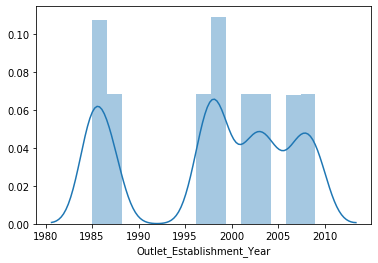

In [51]:
sns.distplot(df['Outlet_Establishment_Year'])
plt.show() 

In [52]:
print(df['Outlet_Establishment_Year'].nunique())
df['Outlet_Establishment_Year'].unique()

9


array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [53]:
YData=df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median()
YData

Outlet_Establishment_Year
1985    1845.5976
1987    2050.6640
1997    1945.8005
1998     250.3408
1999    1966.1074
2002    1834.9448
2004    2109.2544
2007    2005.0567
2009    1655.1788
Name: Item_Outlet_Sales, dtype: float64

In [54]:
r=np.corrcoef(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'])[0,1]
r

-0.049083287668101494

* Will drop this feature

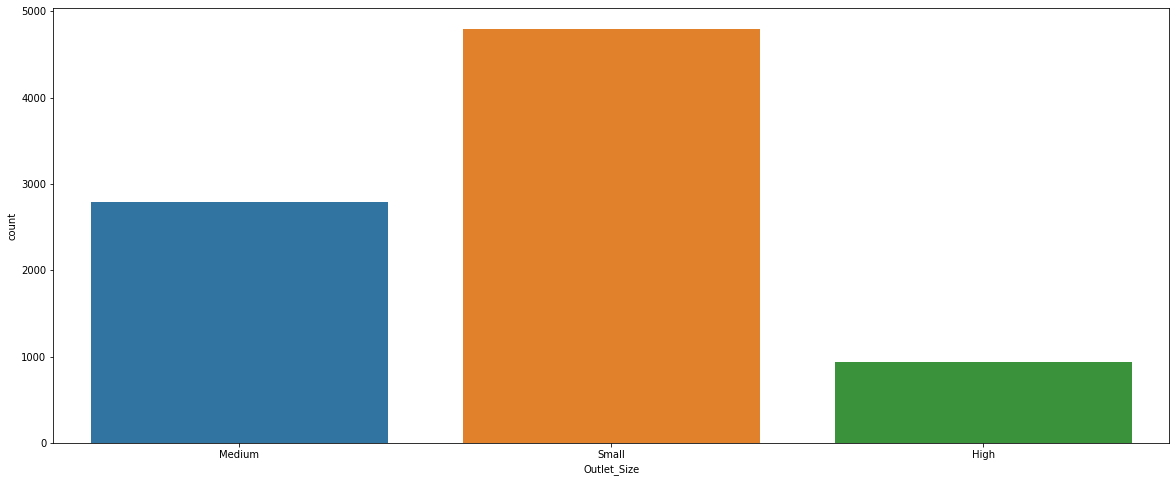

In [55]:
fig,ax=plt.subplots(figsize=(20,8))
sns.countplot(df['Outlet_Size'],ax=ax)
plt.show()

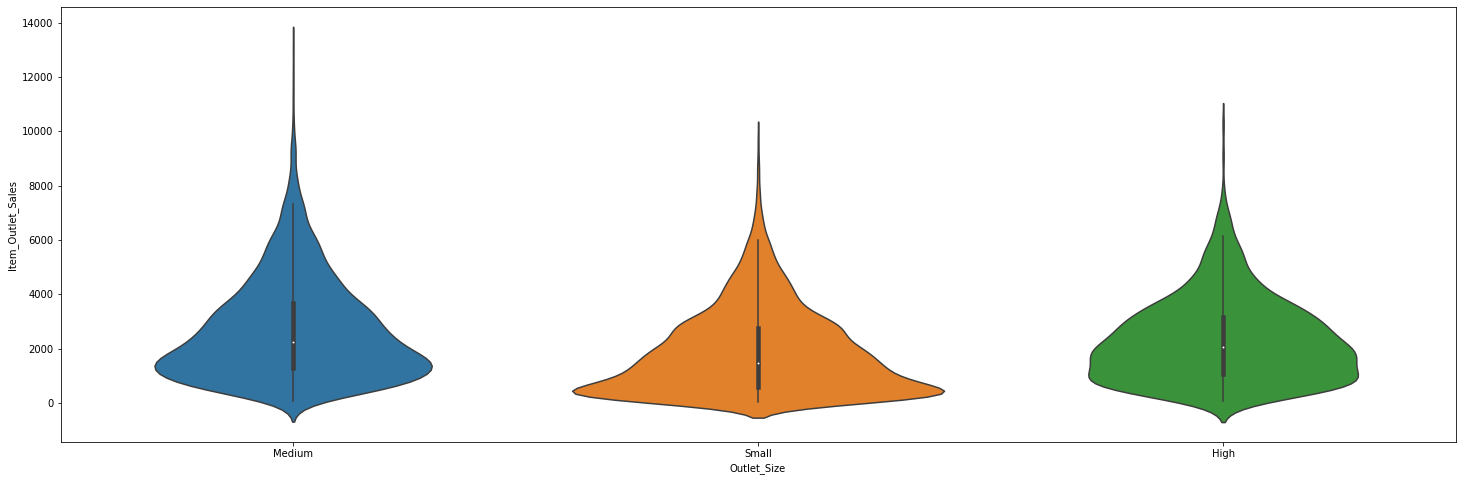

In [56]:
fig,ax=plt.subplots(figsize=(25,8))
sns.violinplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df,kind='violin',ax=ax)
plt.show()

In [57]:
SData=df.groupby('Outlet_Size')['Item_Outlet_Sales'].median()
SData

Outlet_Size
High      2050.6640
Medium    2250.7369
Small     1486.0656
Name: Item_Outlet_Sales, dtype: float64

* Size Will effect the Outcome

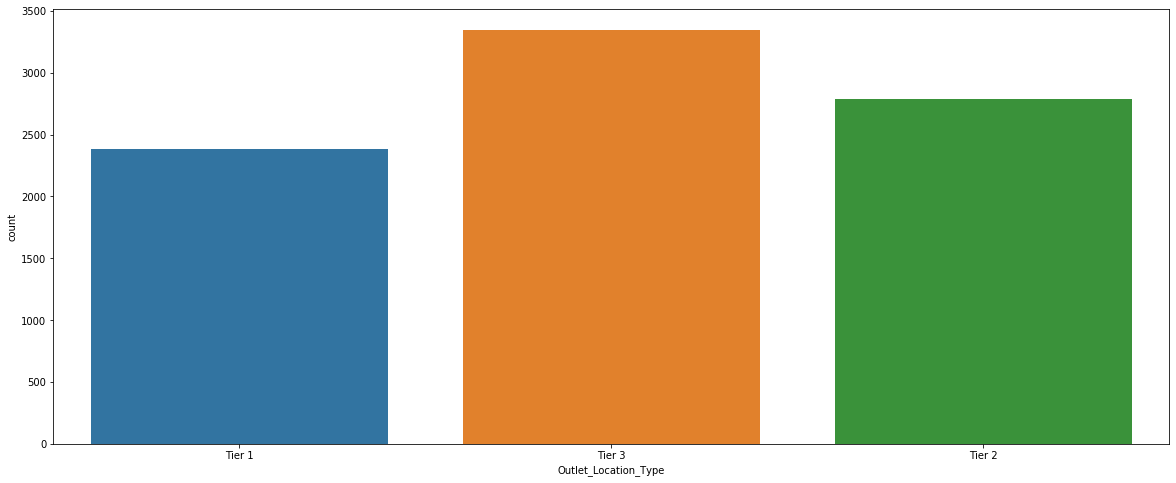

In [58]:
fig,ax=plt.subplots(figsize=(20,8))
sns.countplot(df['Outlet_Location_Type'],ax=ax)
plt.show()

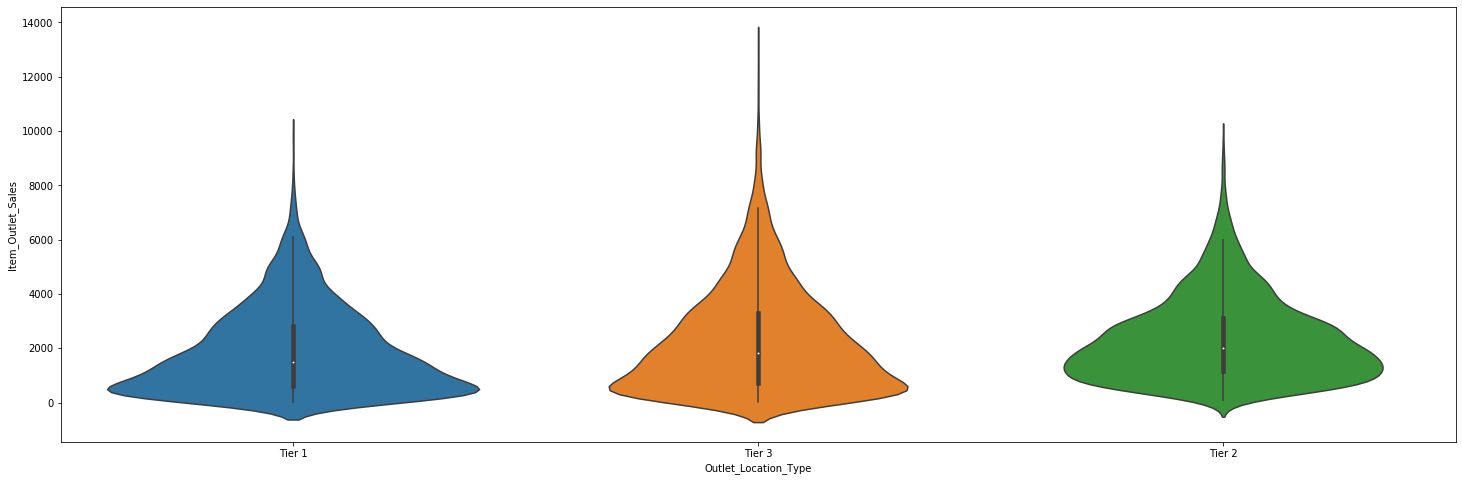

In [59]:
fig,ax=plt.subplots(figsize=(25,8))
sns.violinplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df,kind='violin',ax=ax)
plt.show()

In [60]:
LData=df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].median()
LData

Outlet_Location_Type
Tier 1    1488.063
Tier 2    2004.058
Tier 3    1810.976
Name: Item_Outlet_Sales, dtype: float64

* Will effect

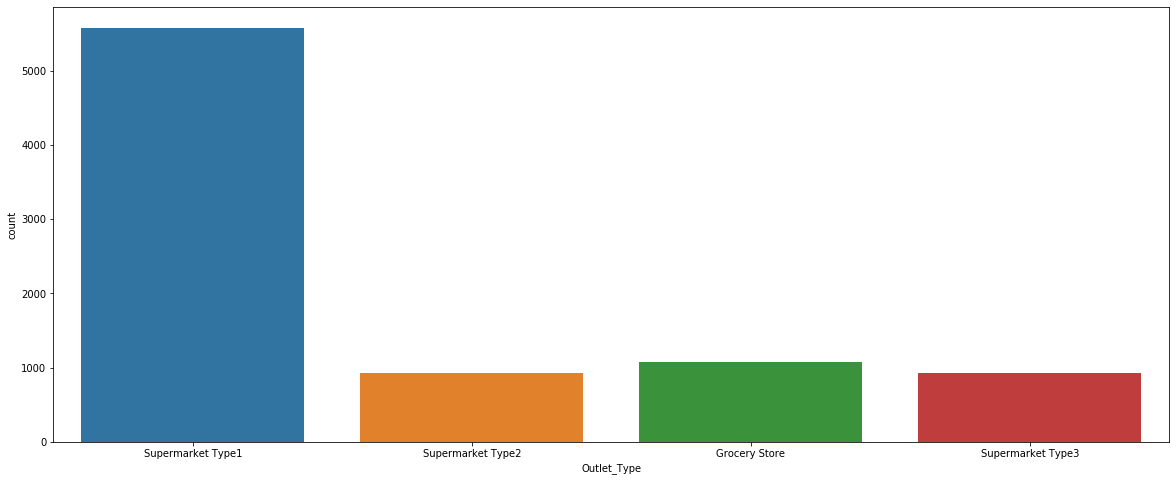

In [61]:
fig,ax=plt.subplots(figsize=(20,8))
sns.countplot(df['Outlet_Type'],ax=ax)
plt.show()

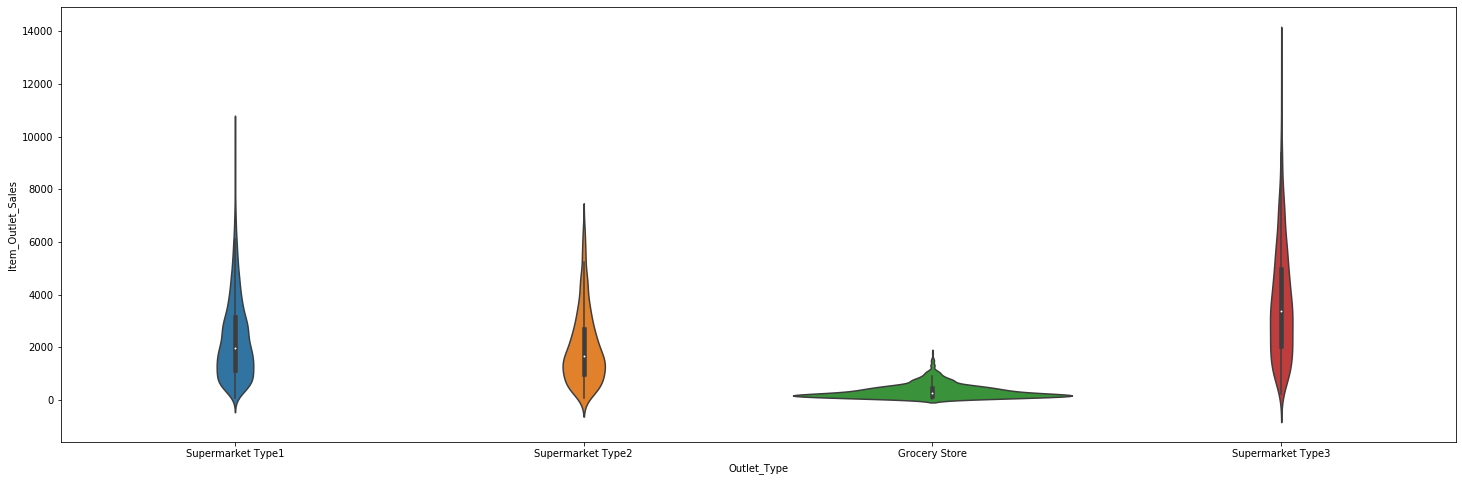

In [62]:
fig,ax=plt.subplots(figsize=(25,8))
sns.violinplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,kind='violin',ax=ax)
plt.show()

In [63]:
TData=df.groupby('Outlet_Type')['Item_Outlet_Sales'].median()
TData

Outlet_Type
Grocery Store         256.9988
Supermarket Type1    1990.7420
Supermarket Type2    1655.1788
Supermarket Type3    3364.9532
Name: Item_Outlet_Sales, dtype: float64

* Will effect

# Feature Engineering & Selection

In [65]:
size_mapping = {
                 'Small': 0,
                 'Medium': 1,
                 'High':2}

df['Outlet_Size'] = (df['Outlet_Size']).map(size_mapping)

In [66]:
size_mapping = {
                 'Tier 1': 0,
                 'Tier 2': 1,
                 'Tier 3':2}

df['Outlet_Location_Type'] = (df['Outlet_Location_Type']).map(size_mapping)

In [71]:
Data=df
Data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [74]:
Data=pd.get_dummies(Data,drop_first=True)

In [75]:
Data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,1,0,3735.1380,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,1,2,443.4228,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,1,0,2097.2700,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,19.20,0.003575,182.0950,1998,0,2,732.3800,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0.003575,53.8614,1987,2,2,994.7052,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [77]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8519 non-null   float64
 1   Item_Visibility                  8519 non-null   float64
 2   Item_MRP                         8519 non-null   float64
 3   Outlet_Establishment_Year        8519 non-null   int64  
 4   Outlet_Size                      8519 non-null   int64  
 5   Outlet_Location_Type             8519 non-null   int64  
 6   Item_Outlet_Sales                8519 non-null   float64
 7   Item_Fat_Content_Regular         8519 non-null   uint8  
 8   Item_Type_Breads                 8519 non-null   uint8  
 9   Item_Type_Breakfast              8519 non-null   uint8  
 10  Item_Type_Canned                 8519 non-null   uint8  
 11  Item_Type_Dairy                  8519 non-null   uint8  
 12  Item_Type_Frozen Foo

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(Data.drop(labels=['Item_Outlet_Sales'],axis=1), 
                                                    Data['Item_Outlet_Sales'], 
                                                    test_size=0.3, random_state=0)

In [83]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile

In [86]:
top=SelectPercentile(mutual_info_regression,percentile=20)
top.fit(X_train,y_train)
X_train.columns[top.get_support()]

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type3'],
      dtype='object')